 이미지 이진 분류/다중 분류
- 데이터셋 : MNIST
- [조건1] 모델 성능지표 분석
- [조건2] 이미지 생성 후 predict까지 진행

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

In [12]:
mnist = fetch_openml('mnist_784', as_frame=False)

C:\Users\desktop\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [13]:
type(mnist)

sklearn.utils._bunch.Bunch

In [14]:
# 모델 성능 지표 분석하기

In [15]:
X, y = mnist['data'], mnist['target']

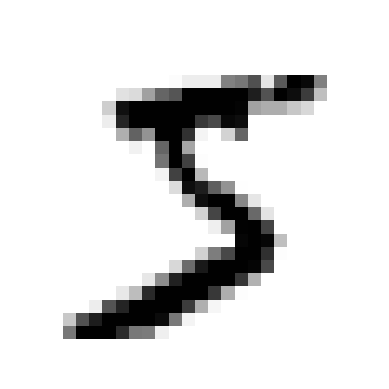

In [16]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [17]:
y[0]

'5'

In [18]:
x_train, x_test, y_train, y_test = X[:6000], X[6000:], y[:6000], y[6000:]

- 이진 분류

In [19]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [20]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [21]:
sgd_clf.predict([some_digit])

array([ True])

In [22]:
import cv2
my_num = cv2.imread("2.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("2.jpg", my_num)
cv2.waitKey(0)
cv2.destroyAllWindows()
my_num = cv2.resize(my_num, (28, 28))

my_num = my_num.ravel()
my_num = abs(my_num.astype("int") - 255) # 이미지는 흰부분이 255라서 

In [23]:
from sklearn.linear_model import SGDClassifier

In [24]:
x_train, x_test, y_train, y_test = X[:6000], X[6000:], y[:6000], y[6000:]

In [25]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [26]:
model_1 = SGDClassifier(random_state=42,verbose=1,loss="log_loss")
train_list = []
test_list = []
for n in range(100):
    model_1.partial_fit(x_train, y_train)
    train_score=model_1.score(x_train, y_train)
    test_score = model_1.score(x_test,y_test)
    print(f"[{n}번 학습] [기본 SGD] 학습 점수 : {train_score}, 테스트 점수 : {test_score}")
    train_list.append(train_score)
    test_list.append(test_score)

ValueError: classes must be passed on the first call to partial_fit.

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score, "b-", label = "Train")
plt.plot(test_score,"r-", label = "Test")

In [ ]:
# 어제 윤서가 준 수업코드를 보고 어떻게든 과제를 해봤다,,,,,, 흑